# Capstone Project

## Task: Exploratory Data Analysis on the Forbes Richest Athletes (1990-2020) Dataset

Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered.
For this task, we are going to clean, sanitise and explore our data, using the Forbes Richest Athletes dataset

In [6]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns

from datetime import date
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# Load the movies dataset 
forbes_df = pd.read_csv('Forbes Richest Athletes1990-2020.csv')
forbes_df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


We can view datatype information and some descriptions on the dataset.

In [21]:
# The information on the datatypes dataset
forbes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [23]:
# View the description of the numerical dataset
forbes_df.describe()

,S.NO,Current Rank,Year,earnings ($ million)
count,301.000000,301.000000,301.000000,301.000000
mean,151.000000,5.448505,2005.122924,45.516279
std,87.035433,2.850995,9.063563,33.525337
min,1.000000,1.000000,1990.000000,8.100000
25%,76.000000,3.000000,1997.000000,24.000000
50%,151.000000,5.000000,2005.000000,39.000000
75%,226.000000,8.000000,2013.000000,59.400000
max,301.000000,10.000000,2020.000000,300.000000


# Data Cleaning
## Clean the data and treatment of missing values

We identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following column `['Previous Year Rank']` from the data set as it will not be used in the analysis.

Furthermore, it is crucial to note that from the `forbes_df.info()` output the column `['Previous Year Rank']` is the only field with missing values. The 24 missing values can be categorised as missing completely at random.

Thus, removing/dropping the column `['Previous Year Rank']` will also be the treatment for dealing with the missing value in the Forbes Richest Athletes dataset.

<Axes: >

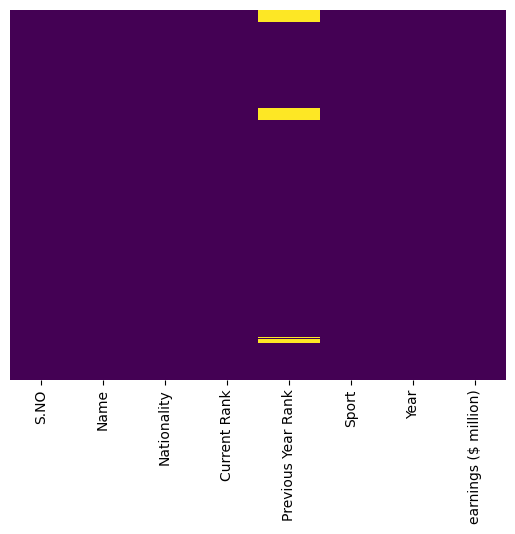

In [32]:
# We visualise the missing data with visual aide of a heatmap
sns.heatmap(forbes_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [34]:
# Drop/Remove the redundant column
forbes_df = forbes_df.drop(columns=['Previous Year Rank'], axis=1)
forbes_df.head()

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,boxing,1990,28.6
1,2,Buster Douglas,USA,2,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,auto racing,1990,10.0
4,5,Alain Prost,France,5,auto racing,1990,9.0


#### Moreover, it is ideal at this stage to remove/drop all the duplicated rows/records in the dataframe.

In [40]:
# Extract the duplicated rows in the auto dataset
duplicates = forbes_df[forbes_df.duplicated() == 1]

# View the top 5 duplicated rows if there are any?
duplicates.head()

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)


Fortunately!, there are no duplicated rows in the datatframe.

In [44]:
# The information on the datatypes dataset, will provide assurance on the absence of missing values
forbes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Sport                 301 non-null    object 
 5   Year                  301 non-null    int64  
 6   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 16.6+ KB


## Change data types and format columns

The following columns have been identified for both formating of certain columns and changing of the datatypes.

##### Change data types for `['Current Rank']` into [object] datatypes.
The column `[Current Rank]` is a categorical feature with ordinal values.

##### Change format for `[Nationality, Sport]` into title case mode and replace non-unique sporting codes.

##### Rename column `['earnings ($ million)']` into `['Earnings ($ million)']` datatypes.


In [61]:
# Change the datatype for Current Rank
forbes_df['Current Rank'] = forbes_df['Current Rank'].astype(str)

# Create a year column Year_DT with years in datetime format
forbes_df['Year_DT'] = pd.to_datetime(forbes_df['Year'], format='%Y')
forbes_df['Year_DT'] = forbes_df['Year_DT'].dt.year

# Drop this new column
forbes_df.drop(columns=['Year_DT'], inplace=True, axis=1)

forbes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    object 
 4   Sport                 301 non-null    object 
 5   Year                  301 non-null    int64  
 6   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 16.6+ KB


In [63]:
forbes_df.sample(1)

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
110,111,Tiger Woods,USA,1,Golf,2002,69.0


In [73]:
# Change in column "Nationality" USA and UK into United States and United Kingdom
forbes_df['Nationality'] = forbes_df['Nationality'].str.replace('UK','United Kingdom')
forbes_df['Nationality'] = forbes_df['Nationality'].str.replace('USA','United States')

forbes_df['Nationality'].unique()


array(['United States', 'Brazil', 'France', 'Australia', 'Canada',
       'United Kingdom', 'Austria', 'Germany', 'Russia', 'Italy',
       'Finland', 'Switzerland', 'Philippines', 'Portugal', 'Dominican',
       'Argentina', 'Filipino', 'Spain', 'Serbia', 'Northern Ireland',
       'Ireland', 'Mexico'], dtype=object)

In [75]:
# Change format in column 'Sport'
forbes_df['Sport'] = forbes_df['Sport'].str.title()
forbes_df['Sport'].unique()

array(['Boxing', 'Auto Racing', 'Golf', 'Basketball', 'Tennis', 'Nfl',
       'Nba', 'Baseball', 'Ice Hockey', 'American Football / Baseball',
       'F1 Motorsports', 'Nascar', 'Hockey', 'Auto Racing (Nascar)',
       'F1 Racing', 'American Football', 'Soccer', 'Cycling',
       'Motorcycle Gp', 'Mma'], dtype=object)

The following sporting codes in the data will be replaced as follows:

Mma --> MMA

Nba --> Basketball

Ice Hockey --> Hockey

Nfl --> American Football

F1 Motorsports, F1 Racing, Auto Racing (Nascar), Nascar --> Auto Racing

This will help with the reduction of the duplication of the same sporting codes.

In [80]:
# Replace the sporting codes with the correct sport
events = ['Mma','Nba','Ice Hockey','Nfl','F1 Motorsports', 'Nascar', 'Auto Racing (Nascar)','F1 Racing']
output = ['MMA','Basletball','Hockey','American Football','Auto Racing', 'Auto Racing', 'Auto Racing','Auto Racing']

for i in range(len(events)):
    if len(events) == len(output):
        forbes_df['Sport'] = forbes_df['Sport'].str.replace(events[i],output[i])
    else:
        print("The length of the codes are not equal!")

# View the unique sporting codes    
forbes_df['Sport'].unique()


array(['Boxing', 'Auto Racing', 'Golf', 'Basketball', 'Tennis',
       'American Football', 'Basletball', 'Baseball', 'Hockey',
       'American Football / Baseball', 'Auto Racing (Auto Racing)',
       'Soccer', 'Cycling', 'Motorcycle Gp', 'MMA'], dtype=object)

In [82]:
# Replace the 'Auto Racing (Auto Racing)' with 'Auto Racing'
forbes_df['Sport'] = forbes_df['Sport'].str.replace('Auto Racing (Auto Racing)','Auto Racing')

# View the unique sporting codes    
forbes_df['Sport'].unique()


array(['Boxing', 'Auto Racing', 'Golf', 'Basketball', 'Tennis',
       'American Football', 'Basletball', 'Baseball', 'Hockey',
       'American Football / Baseball', 'Soccer', 'Cycling',
       'Motorcycle Gp', 'MMA'], dtype=object)

In [98]:
# Replace the 'Auto Racing (Auto Racing)' with 'Auto Racing'
forbes_df['Sport'] = forbes_df['Sport'].str.replace('Basletball','Basketball')

# Deion Sanders played in the NFL for most of his pro-career
# Replace American Football/Baseball with American Football
forbes_df['Sport'] = forbes_df['Sport'].str.replace('American Football / Baseball','American Football')

# View the unique sporting codes    
forbes_df['Sport'].unique()

array(['Boxing', 'Auto Racing', 'Golf', 'Basketball', 'Tennis',
       'American Football', 'Baseball', 'Hockey', 'Soccer', 'Cycling',
       'Motorcycle Gp', 'MMA'], dtype=object)

In [100]:
# Rename the 'earnings ($ million)' to 'Earnings'
forbes_df = forbes_df.rename(columns={'earnings ($ million)':'Earnings'})
forbes_df.sample(1)

,S.NO,Name,Nationality,Current Rank,Sport,Year,Earnings
163,164,Phil Mickelson,United States,3,Golf,2007,42.0


The above steps have changed the appropriate datatypes and formats.

We take a look at the important information prior to implementing some Exploratory Data Analysis (EDA).

In [102]:
# Get a general description of the Earnings numerical data
forbes_df.describe()['Earnings']

count    301.000000
mean      45.516279
std       33.525337
min        8.100000
25%       24.000000
50%       39.000000
75%       59.400000
max      300.000000
Name: Earnings, dtype: float64

In [104]:
# We can reset the index of the dataframe
forbes_df = forbes_df.reset_index(drop=True)

# Get a general information of the dataframe
forbes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   S.NO          301 non-null    int64  
 1   Name          301 non-null    object 
 2   Nationality   301 non-null    object 
 3   Current Rank  301 non-null    object 
 4   Sport         301 non-null    object 
 5   Year          301 non-null    int64  
 6   Earnings      301 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 16.6+ KB


## We are in a position now to commence with the exploration

### Identification of relationships between variables (features)

The main goal here is to identify and create relationships that can assist to formulate ideas. We start with questions to help with the identification of some relationships to explore.

##### Identify the top 5 highest earners from 1990 to 2020
##### Identify the top 5 highest earners from 1990 to 1999
##### Identify the top 5 highest earners from 2000 to 2009
##### Identify the top 5 highest earners from 2010 to 2020

In [123]:
# Identify the top 5 highest earners from 1990 - 2020
high_earner = forbes_df.sort_values('Earnings',ascending=False)
high_earner.head()[['Name','Nationality','Current Rank','Sport','Year','Earnings']]

,Name,Nationality,Current Rank,Sport,Year,Earnings
241,Floyd Mayweather,United States,1,Boxing,2015,300.0
271,Floyd Mayweather,United States,1,Boxing,2018,285.0
242,Manny Pacquiao,Philippines,2,Boxing,2015,160.0
281,Lionel Messi,Argentina,1,Soccer,2019,127.0
171,Tiger Woods,United States,1,Golf,2008,115.0


In [125]:
# Identify the top 5 highest earners from 1990 - 1999
high_earner_1990s = forbes_df.loc[forbes_df['Year'] <= 1999].sort_values('Earnings',ascending=False)
high_earner_1990s.head()[['Name','Nationality','Current Rank','Sport','Year','Earnings']]

,Name,Nationality,Current Rank,Sport,Year,Earnings
70,Michael Jordan,United States,1,Basketball,1997,78.3
60,Mike Tyson,United States,1,Boxing,1996,75.0
80,Michael Jordan,United States,1,Basketball,1998,69.0
10,Evander Holyfield,United States,1,Boxing,1991,60.5
71,Evander Holyfield,United States,2,Boxing,1997,54.3


In [129]:
# Identify the top 5 highest earners from 2000 - 2009
high_earner_2000s = forbes_df.loc[(forbes_df['Year'] >= 2000) & (forbes_df['Year'] <= 2009)].sort_values('Earnings',ascending=False)
high_earner_2000s.head()[['Name','Nationality','Current Rank','Sport','Year','Earnings']]

,Name,Nationality,Current Rank,Sport,Year,Earnings
171,Tiger Woods,United States,1,Golf,2008,115.0
181,Tiger Woods,United States,1,Golf,2009,110.0
161,Tiger Woods,United States,1,Golf,2007,100.0
151,Tiger Woods,United States,1,Golf,2006,90.0
141,Tiger Woods,United States,1,Golf,2005,87.0


In [131]:
# Identify the top 5 highest earners from 2000 - 2009
high_earner_2010s = forbes_df.loc[(forbes_df['Year'] >= 2010)].sort_values('Earnings',ascending=False)
high_earner_2010s.head()[['Name','Nationality','Current Rank','Sport','Year','Earnings']]

,Name,Nationality,Current Rank,Sport,Year,Earnings
241,Floyd Mayweather,United States,1,Boxing,2015,300.0
271,Floyd Mayweather,United States,1,Boxing,2018,285.0
242,Manny Pacquiao,Philippines,2,Boxing,2015,160.0
281,Lionel Messi,Argentina,1,Soccer,2019,127.0
272,Lionel Messi,Argentina,2,Soccer,2018,111.0


The overall high earners are from the 1990 - 2020 period, with American boxing legend Floyd Mayweather dominating the top five earners.

Majority of the periods are dominated by athletes from the United States.

An interesting observation is that the sport of boxing features prominently in all the periods except for the early 2000's.

Tyger Woods total domination in the early 2000s `(2000 - 2009)` is very noticable, an anomaly compared to the other decades.

The highest top 5 earners were either ranked first or second in the Forbes list for each period.

###### Any furhter analysis going forward will involve the following features:
###### Nationality, Current Rank, Sport, Year and Earnings

#### We can visualise the frequency of Nationality, Current Rank and Sport

This will provide uas with the picture of the dominant items in each feauture

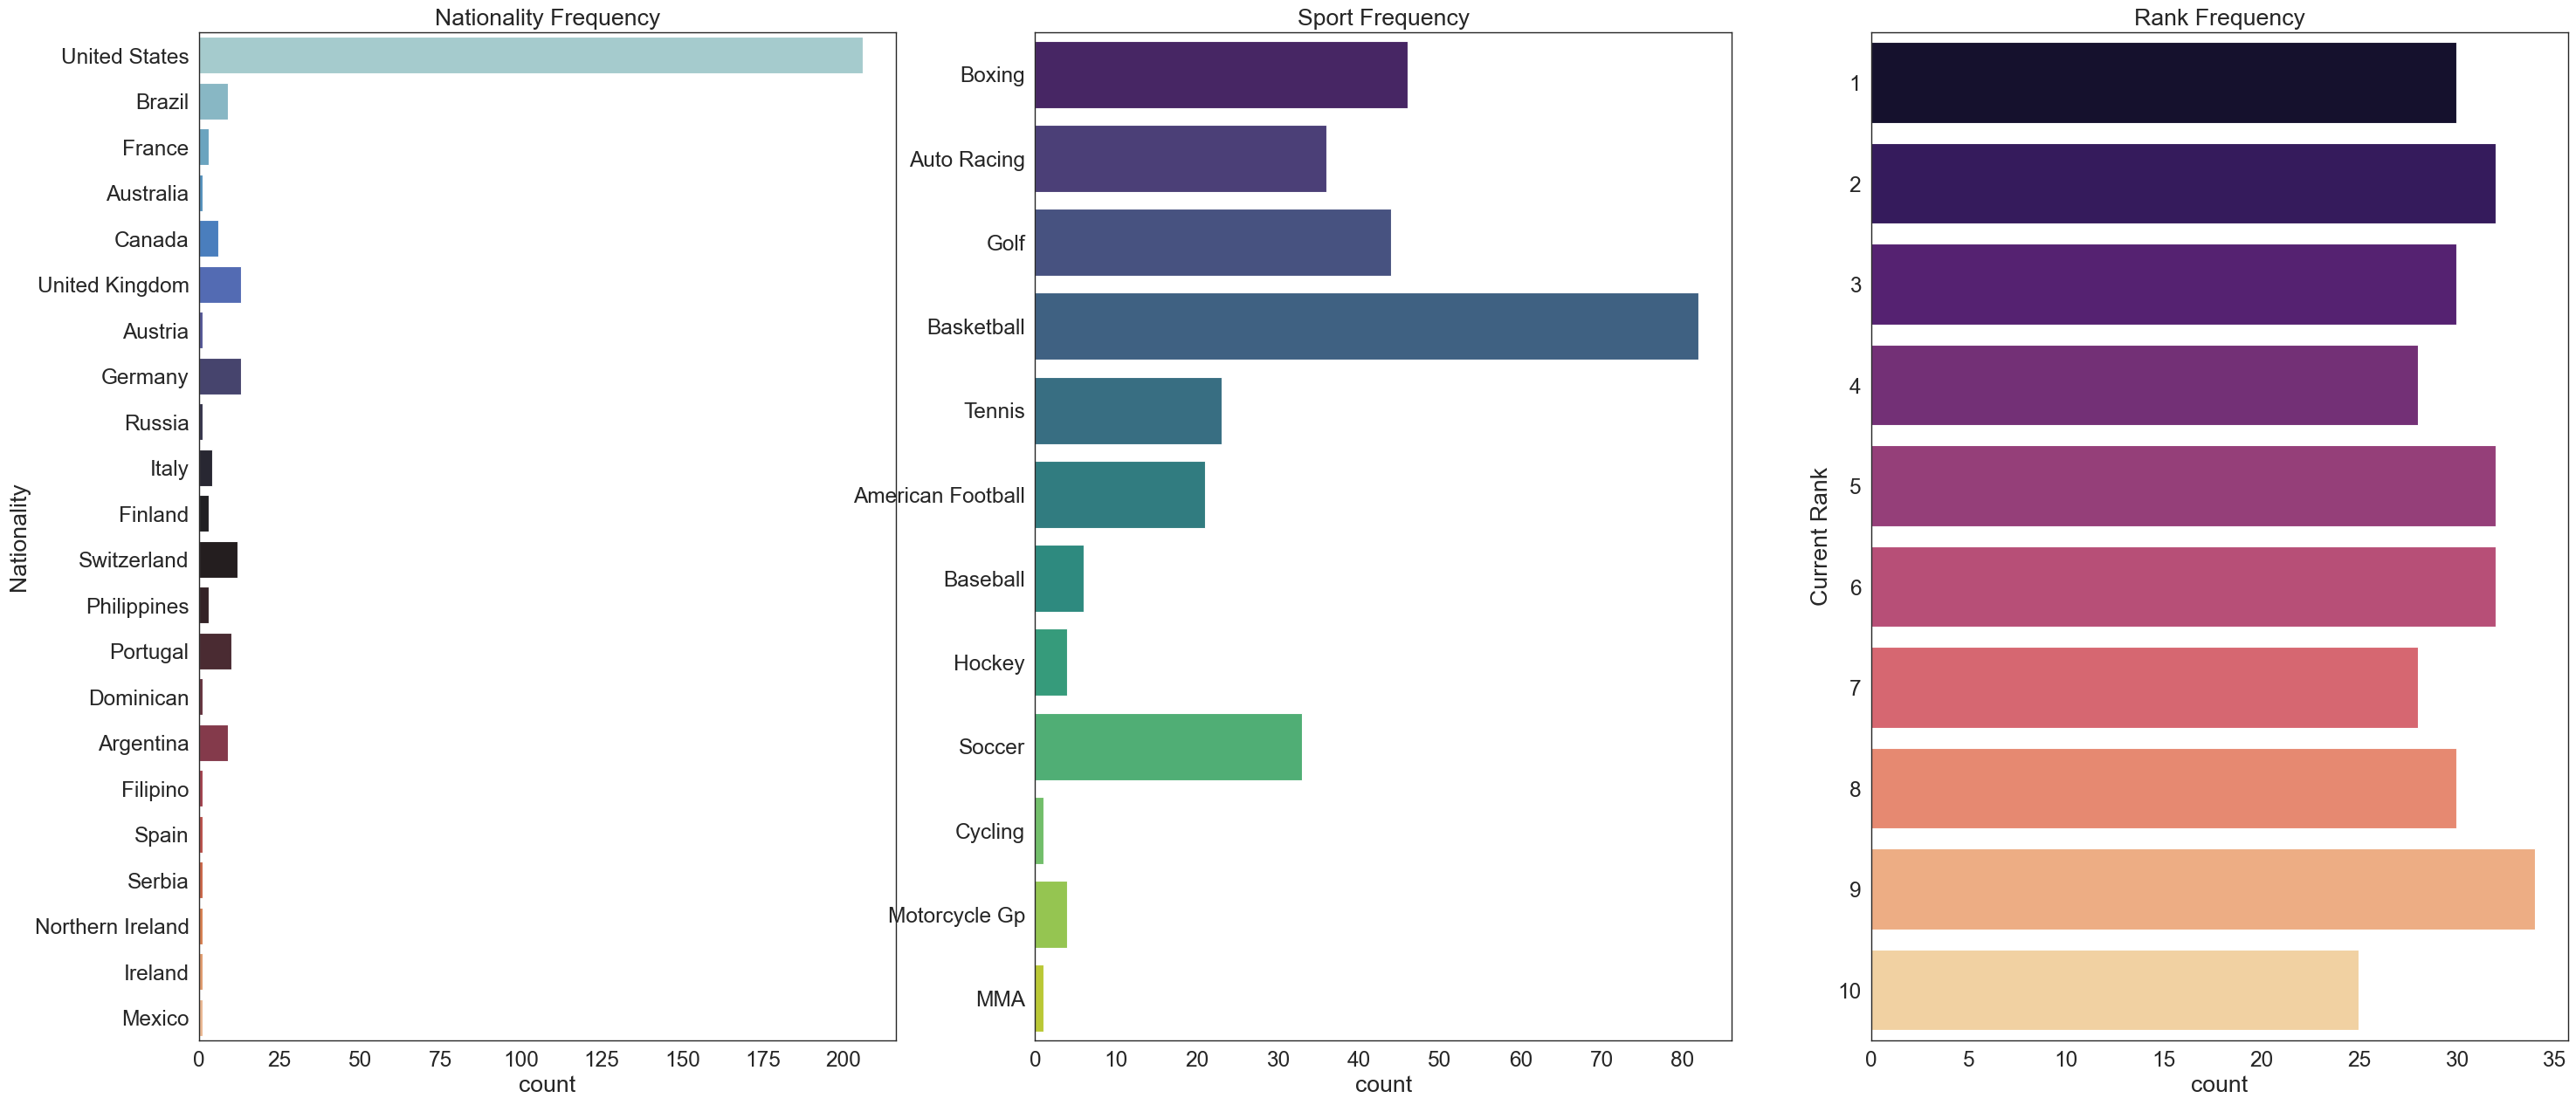

In [159]:
# Visualise some categorical features over the period 1990 -2020

# Create figure size
fig =plt.figure(figsize=(35,15))

# set the style for axis and grids to white ----> dark, white, darkgrid, whitegrid
sns.set_style('white')

# give presentation context via 'paper' ---> paper/talk/poster
sns.set_context('paper', font_scale=2.0)

ax0 = plt.subplot(1,3,1)
ax1 = plt.subplot(1,3,2)
ax2 = plt.subplot(1,3,3)

sns.countplot(data=forbes_df, y='Nationality', orient='h', palette='icefire', ax=ax0)
ax0.set_title("Nationality Frequency")

sns.countplot(data=forbes_df, y='Sport', orient='h', palette='viridis', ax=ax1)
ax1.set_ylabel(None)
ax1.set_title("Sport Frequency")

sns.countplot(data=forbes_df, y='Current Rank', orient='h', palette='magma', ax=ax2)
ax2.set_title("Rank Frequency")

plt.show()

The United States dominates the list of countries in the list, meaning that an overwhelming majority of the atheletes are from the USA.

Basketball, Boxing, Golf, Auto Racing and Soccer lead the representation of sporting codes with the highest earners in the Forbes Richest Athletes list.

Current Rankings are evenly presented in the forbes list of rich athletes.

#### We can visualise aslo visualise the trend of the earnings over the period (1990-2020)

This will provide with the trend of the earnings

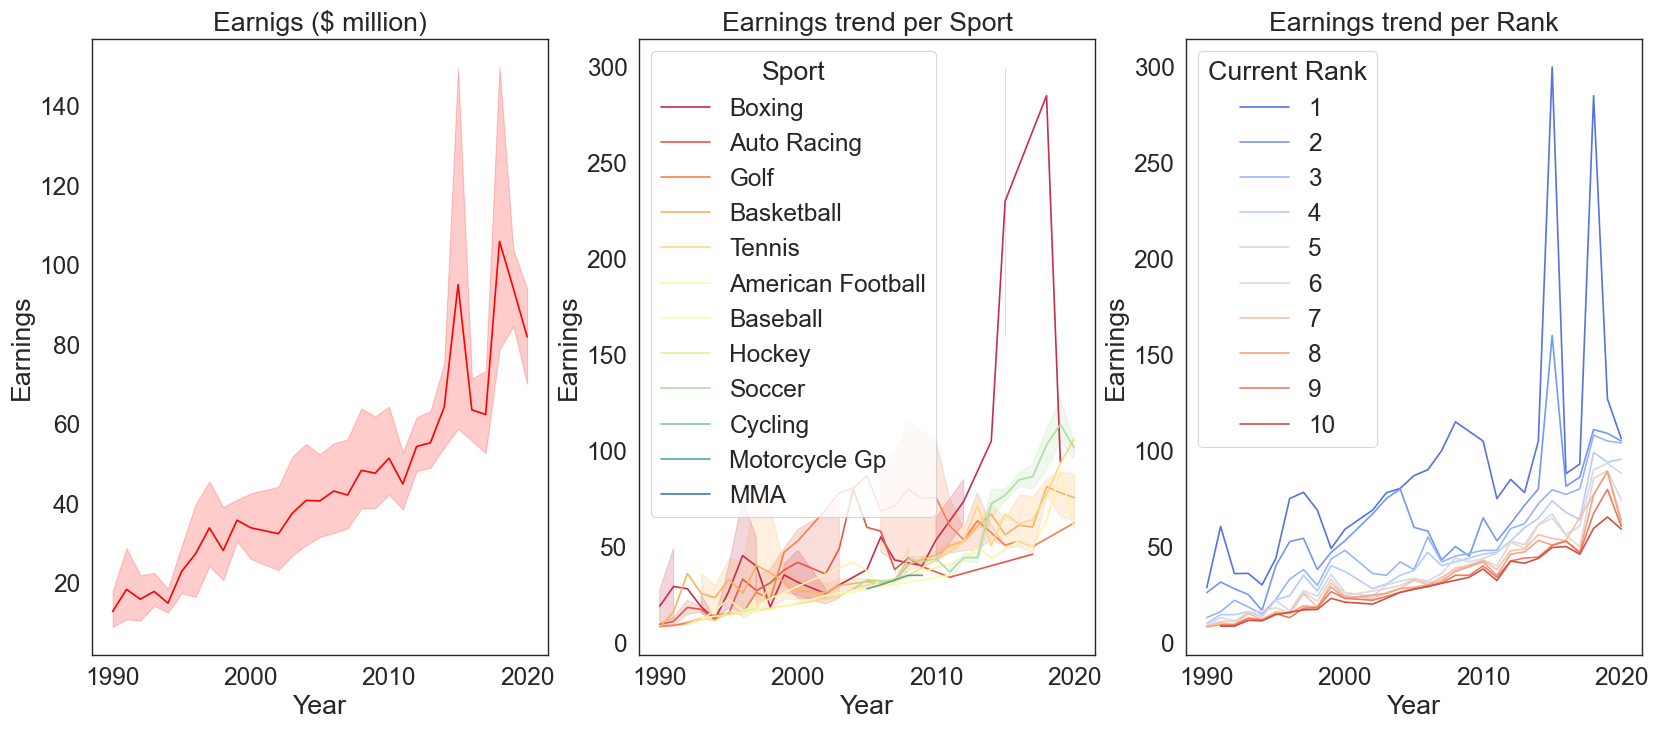

In [168]:
# Visualiseearnings features over the years (1990 -2020)

# Create figure size
fig =plt.figure(figsize=(20,8))

# set the style for axis and grids to white ----> dark, white, darkgrid, whitegrid
sns.set_style('white')

# give presentation context via 'paper' ---> paper/talk/poster
sns.set_context('paper', font_scale=2.0)

ax0 = plt.subplot(1,3,1)
ax1 = plt.subplot(1,3,2)
ax2 = plt.subplot(1,3,3)

sns.lineplot(data=forbes_df, x='Year', y='Earnings', color='red', ax=ax0)
ax0.set_title("Earnigs ($ million)")

sns.lineplot(data=forbes_df, x='Year', y='Earnings', hue='Sport', palette='Spectral', ax=ax1)
ax1.set_title("Earnings trend per Sport")

sns.lineplot(data=forbes_df, x='Year', y='Earnings', hue='Current Rank', palette='coolwarm', ax=ax2)
ax2.set_title("Earnings trend per Rank")

plt.show()

The earnings trend have been on an upward trajectory over the years.

The earnigs from Boxing and Rank-1 were an anomaly in the last decade (2010 -2020). This can be attributed to high earnings of Floyd Mayweather, 
seemingly the trend reverted to the mean post his retirement.

#### We can visualise the influence of Nationality, Rank & Sport on the Earnings

###### Create a box-plot explaining the earnings feature

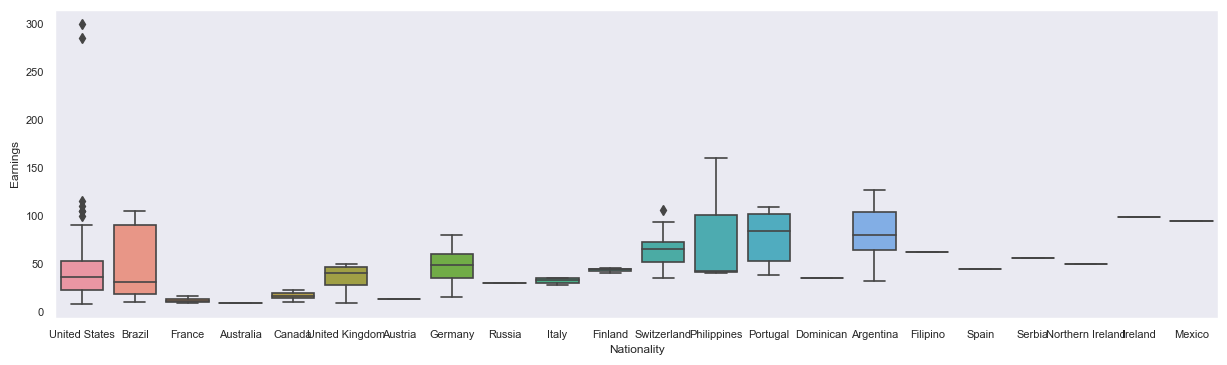

In [185]:
# Create figure size
fig =plt.figure(figsize=(15,4))

# set the style for axis and grids to white ----> dark, white, darkgrid, whitegrid
sns.set_style('dark')

# give presentation context via 'paper' ---> paper/talk/poster
sns.set_context('paper', font_scale=0.9)

sns.boxplot(data=forbes_df,x='Nationality',y='Earnings')

plt.show()

The United states and Switzerland are the only countries with outliers.

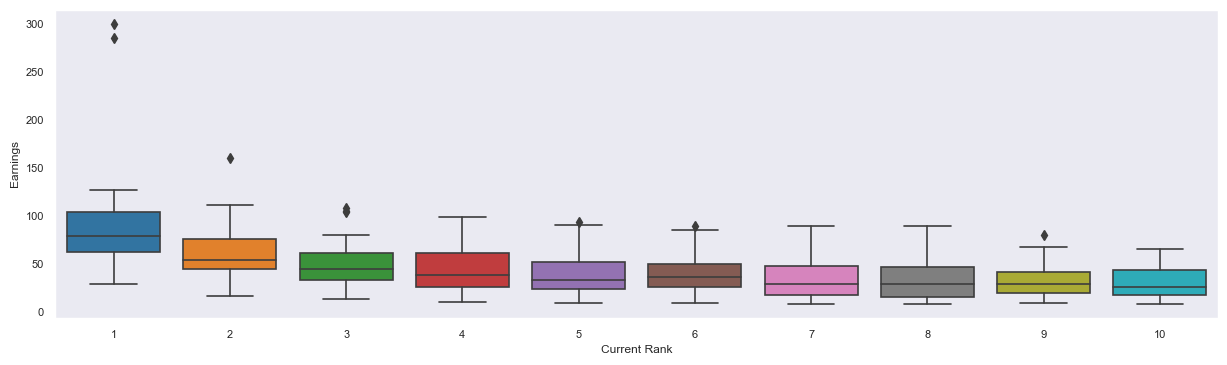

In [187]:
# Create figure size
fig =plt.figure(figsize=(15,4))

# set the style for axis and grids to white ----> dark, white, darkgrid, whitegrid
sns.set_style('dark')

# give presentation context via 'paper' ---> paper/talk/poster
sns.set_context('paper', font_scale=0.9)

sns.boxplot(data=forbes_df,x='Current Rank',y='Earnings')

plt.show()

The Current Rank variability is in line with the Earnings.

The outliers are more pronounced in Rank-1, Rank-2, and Rank-3.

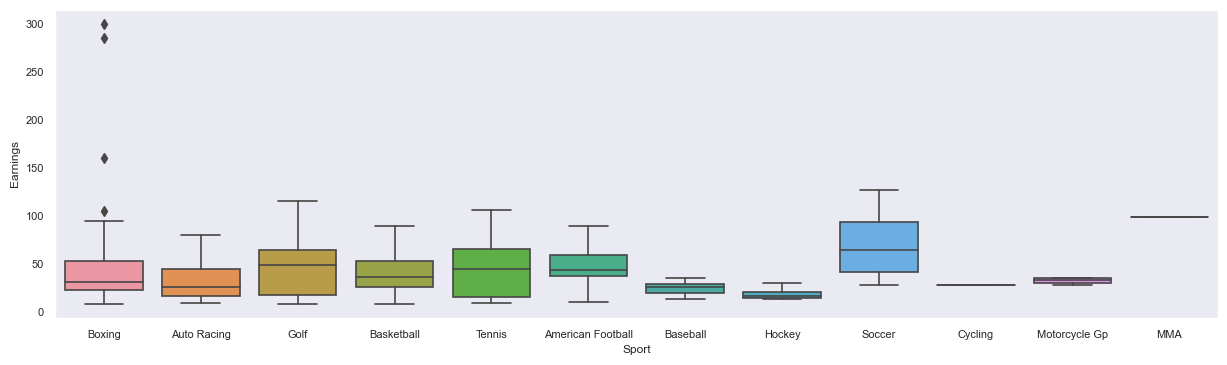

In [189]:
# Create figure size
fig =plt.figure(figsize=(15,4))

# set the style for axis and grids to white ----> dark, white, darkgrid, whitegrid
sns.set_style('dark')

# give presentation context via 'paper' ---> paper/talk/poster
sns.set_context('paper', font_scale=0.9)

sns.boxplot(data=forbes_df,x='Sport',y='Earnings')

plt.show()

Boxing is the only sport with outliers

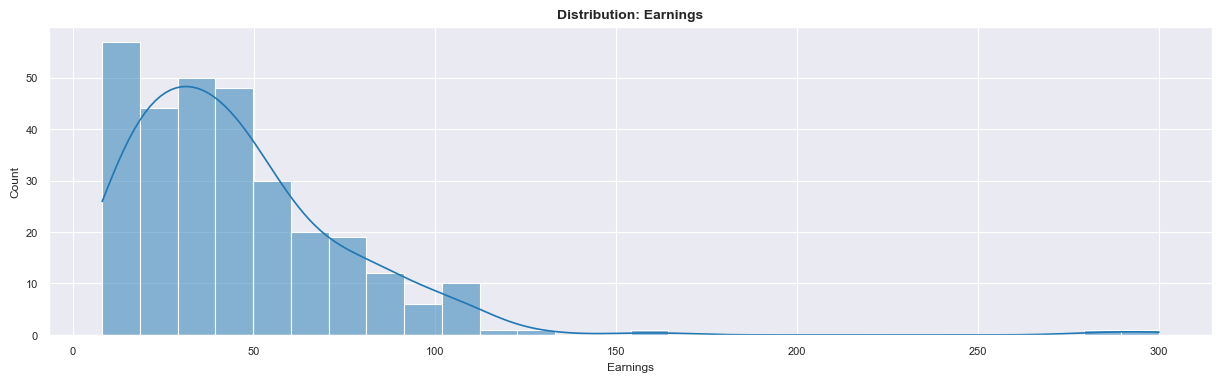

In [206]:
# Create figure size
fig =plt.figure(figsize=(15,4))

# set the style for axis and grids to white ----> dark, white, darkgrid, whitegrid
sns.set_style('darkgrid')

# give presentation context via 'paper' ---> paper/talk/poster
sns.set_context('paper', font_scale=0.9)

sns.histplot(data=forbes_df, x='Earnings', kde=True)
plt.title('Distribution: Earnings', fontdict={'fontweight': 'bold', 'fontsize': 10})

plt.show()